# XHALE model example: Wing Root Bending Moment
this file is a example on XHALE model which creates the WRBM from generate_xhale file.
please use as a reference for any work related.

<p style="color:red;">IMPORTANT NOTE!! XHALE model wouold only compartable and tested on sharpy versions 2.1/2.0, If you are using Sharpy 2.3 or higher version, currently the modelling would RESULT fluctuations .</p> 
suggest use <p style="color:gray;">git clone --branch 2.0 --recursive http://github.com/ImperialCollegeLondon/sharpy</p> in WSL terminal to get versions 2.0


#### 1. import python environments 
this also checks whether you got the sharpy installed correctly

In [1]:
import sharpy
import sharpy.sharpy_main as sharpy_main

import h5py as h5
import numpy as np
import os
import sharpy.utils.algebra as algebra
import matplotlib.pyplot as plt #creat matplotlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd #add pandas to read the data

#### 2. Run generate_xhale model
The model does not need to change any thing from current github folder

In [2]:
route_to_case = '/home/ydair/sharpy_cases/XHALE'
%run '/home/ydair/sharpy_cases/XHALE/generate_xhale.py'


Generating xhale with vertical Ctail
number of time step =  560
mstar =  160
--------------------------------------------------------------------------------
            ######  ##     ##    ###    ########  ########  ##    ##
           ##    ## ##     ##   ## ##   ##     ## ##     ##  ##  ##
           ##       ##     ##  ##   ##  ##     ## ##     ##   ####
            ######  ######### ##     ## ########  ########     ##
                 ## ##     ## ######### ##   ##   ##           ##
           ##    ## ##     ## ##     ## ##    ##  ##           ##
            ######  ##     ## ##     ## ##     ## ##           ##
--------------------------------------------------------------------------------
Aeroelastics Lab, Aeronautics Department.
    Copyright (c), Imperial College London.
    All rights reserved.
    License available at https://github.com/imperialcollegelondon/sharpy
Running SHARPy from /home/ydair/sharpy_backup_2_1
SHARPy being run is in /home/ydair/sharpy_backup_2_1/sharpy

/home/ydair/sharpy_backup_2_1/sharpy/sharpy/aero/utils/uvlmlib.py:269: RuntimeWarning: invalid value encountered in divide
  flightconditions.uinf_direction = np.ctypeslib.as_ctypes(ts_info.u_ext[0][:, 0, 0]/flightconditions.uinf)
/home/ydair/sharpy_backup_2_1/sharpy/sharpy/aero/utils/uvlmlib.py:330: RuntimeWarning: invalid value encountered in divide
  flightconditions.uinf_direction = np.ctypeslib.as_ctypes(ts_info.u_ext[0][:, 0, 0]/flightconditions.uinf)


|  118  | 0.2107 |  7   |   0.265526   |  11.753442   |  -6.407187   |-1.415739e+01 | 1.069635e-02 |
|  119  | 0.2125 |  7   |   0.259416   |  10.508980   |  -6.105881   |-1.415612e+01 | 1.947194e-02 |
|  120  | 0.2143 |  7   |   0.258340   |  10.312644   |  -6.209466   |-1.415488e+01 | 2.874331e-02 |
|  121  | 0.2161 |  7   |   0.260311   |  10.200878   |  -6.386476   |-1.415404e+01 | 3.853258e-02 |
|  122  | 0.2179 |  7   |   0.260379   |  10.266555   |  -6.135378   |-1.415300e+01 | 4.873715e-02 |
|  123  | 0.2196 |  7   |   0.262826   |  10.080992   |  -6.086195   |-1.415134e+01 | 5.935684e-02 |
|  124  | 0.2214 |  7   |   0.263620   |  10.124711   |  -6.427069   |-1.414995e+01 | 7.052271e-02 |
|  125  | 0.2232 |  7   |   0.261710   |  10.241026   |  -6.448290   |-1.414922e+01 | 8.215358e-02 |
|  126  | 0.2250 |  7   |   0.265252   |  10.181925   |  -6.277647   |-1.414817e+01 | 9.406050e-02 |
|  127  | 0.2268 |  7   |   0.264786   |  10.116751   |  -6.371784   |-1.414654e+01 | 1.063

#### 3. RUN WRBM chart from data output
in here, the code grab the data from XHALE/output/gust_xhale_vertical_15_0_15_1/beam

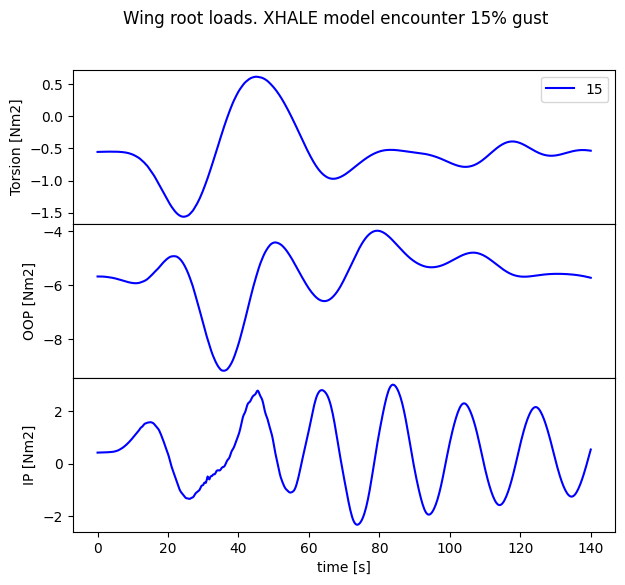

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# !find your directories on your own laptop, and replace the following directories with your own.
# if you run multiple cases, you can add more directories to the list
directories = [
    '/home/ydair/sharpy_cases/XHALE/output/gust_xhale_vertical_15_0_15_1/beam',
   #'/home/ydair/sharpy_cases/XHALE/output/gust_xhale_vertical_15_0_15_2/beam',
   #'/home/ydair/sharpy_cases/XHALE/output/gust_xhale_vertical_15_0_15_3/beam',   
    #'/home/ydair/sharpy_cases/XHALE/output/gust_xhale_vertical_15_0_15_4/beam'
]

# These codes are used to calculate the data from the csv files, the original data is at generate_xhale file, if you run the code above, then you can erase these codes.
#IF you change any of then in genereate_Xhale, also change it
physical_time = 1  
tstep_factor = 1
chord = 0.2
m = 8
u_inf = 14
dt = chord / m / u_inf * tstep_factor

# make sure dt is a scalar
if isinstance(dt, np.ndarray):
    dt = dt.item()  # make sure dt is a scalar

# make sure physical_time is a scalar
if isinstance(physical_time, np.ndarray):
    physical_time = physical_time.item()  # turn physical_time into a scalar

# calculate the number of time steps
n_tstep = round(physical_time / dt)

#initialize the data dictionary
data = {
    'Torsion': [],
    'OOP': [],
    'IP': [],
}

# read the data from the csv files
for directory in directories:
    Mx = []
    My = []
    Mz = []
    
    for i in range(int(n_tstep) + 1):  # turn n_tstep into an integer
        file_path = os.path.join(directory, f'beam_loads_{i}.csv')
        try:
            df = pd.read_csv(file_path)
            Mx.append(df[' Mx'].values[0])
            My.append(df[' My'].values[0])
            Mz.append(df[' Mz'].values[0])
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue
    
    # add data to dictionary
    data['Torsion'].append(np.array(Mx))
    data['OOP'].append(np.array(My))
    data['IP'].append(np.array(Mz))

# creat time vector and non dimensionalize it
time_vec = np.linspace(0, dt * n_tstep, n_tstep + 1)
data['time_nondimensional'] = 2 * time_vec * u_inf / chord

# drawing figures
fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
ylabels = ['Torsion [Nm2]', 'OOP [Nm2]', 'IP [Nm2]']
colors = ['b', 'g', 'r']
labels = ['15', '13.5', '12']

for idim in range(3):
    for i in range(len(directories)):
        key = ylabels[idim].split()[0]  # get the key of the data to plot
        ax[idim].plot(data['time_nondimensional'], data[key][i], color=colors[i], label=labels[i] if idim == 0 else "")
    ax[idim].set_ylabel(ylabels[idim])
    if idim == 0:
        ax[idim].legend()

ax[2].set_xlabel('time [s]')
plt.subplots_adjust(hspace=0)
fig.suptitle('Wing root loads. XHALE model encounter 15% gust')
plt.show()
